In [108]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [171]:
#Define basis states and spin operators
upup = np.array([1,0,0,0]).reshape(4,1)
updown = np.array([0,1,0,0]).reshape(4,1)
downup = np.array([0,0,1,0]).reshape(4,1)
downdown = np.array([0,0,0,1]).reshape(4,1)

S_plus = np.array([[0,0,1,0], [0,0,0,1], [0,0,0,0], [0,0,0,0]])
S_minus = np.array([[0,0,0,0], [0,0,0,0], [1,0,0,0], [0,1,0,0]])
I_plus = np.array([[0,1,0,0], [0,0,0,0], [0,0,0,1], [0,0,0,0]])
I_minus = np.array([[0,0,0,0], [1,0,0,0], [0,0,0,0], [0,0,1,0]])

S_x = (1/2)*(S_plus + S_minus)
S_y = (1/2j)*(S_plus - S_minus)
I_x = (1/2)*(I_plus + I_minus)
I_y = (1/2j)*(I_plus - I_minus)

S_z = (1/2)*np.diag([1,1,-1,-1])
I_z = (1/2)*np.diag([1,-1,1,-1])

In [172]:
#Create Hamiltonian and time evolution operator
delta = 0
Azz = 1e6
time = np.linspace(0,10e-6,1000)

H_zeeman = delta*I_z
H_hyperfine = Azz*S_z*I_z
H = H_zeeman + H_hyperfine

R = np.array([linalg.expm(-(1j)*t*H) for t in time])

In [180]:
#Choose initial state and evolve through time
init_state = (1/np.sqrt(2))*(upup + updown)
state = np.zeros((len(time),4,1), dtype = complex)
Mx = np.zeros((len(time)))
My = np.zeros((len(time)))
Mz = np.zeros((len(time)))

for t in range(0,len(time)):
    state[t,:] = R[t] @ init_state
    Mx[t] = (np.conj(state[t,:].T) @ I_x @ state[t,:]).real
    My[t] = (np.conj(state[t,:].T) @ I_y @ state[t,:]).real
    Mz[t] = (np.conj(state[t,:].T) @ I_z @ state[t,:]).real

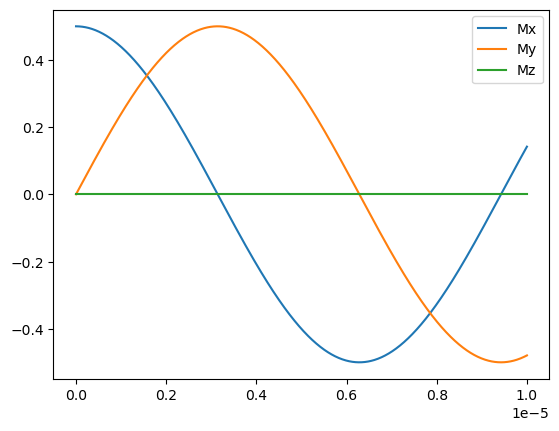

In [181]:
#Plot magnetization
plt.figure()
plt.plot(time, Mx, label = 'Mx')
plt.plot(time, My, label = 'My')
plt.plot(time, Mz, label = 'Mz')
plt.legend()
plt.show()

In [182]:
# Now simulate using density matrix
#Choose initial state and evolve through time
init_state = (1/np.sqrt(2))*(upup + updown)
init_rho = init_state @ (np.conj(init_state).T) 
rho = np.zeros((len(time),4,4), dtype = complex)
Mx = np.zeros((len(time)))
My = np.zeros((len(time)))
Mz = np.zeros((len(time)))

for t in range(0,len(time)):
    rho[t,:] = R[t] @ init_rho @ np.conj(R[t]).T 
    Mx[t] = (np.trace(rho[t] @ I_x)).real
    My[t] = (np.trace(rho[t] @ I_y)).real
    Mz[t] = (np.trace(rho[t] @ I_z)).real

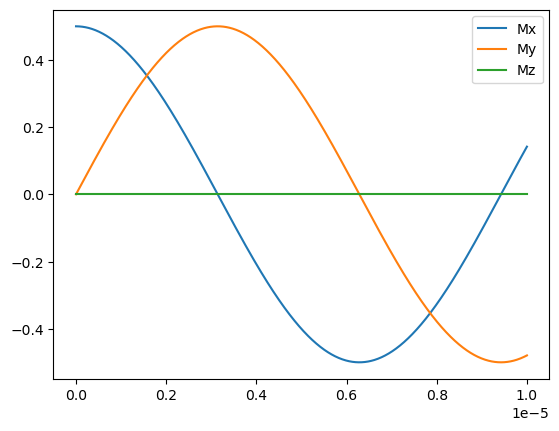

In [183]:
#Plot magnetization
plt.figure()
plt.plot(time, Mx, label = 'Mx')
plt.plot(time, My, label = 'My')
plt.plot(time, Mz, label = 'Mz')
plt.legend()
plt.show()